# 1.1 Batch Gradient Descent

The batch gradient descent procedure takes in the following parameters:

1. fobj = Objective function
2. fgrad = function to compute the gradient
3. init = initial guess
4. alpha = step size or the learning rate
5. eps = convergence criterion or threshold for the algorithm to terminate

The function for a negative Gaussian function is :

$$
f(x) = - frac{10^4}{\sqrt((2\pi)^n|\Sigma|}exp[-1/2(x-\mu)^T\Sigma^{-1}(x-\mu)]
$$


In [2]:
import pylab as pl

def getData():
    
    # load the fitting data for X and y and return as elements of a tuple
    # X is a 100 by 10 matrix and y is a vector of length 100
    # Each corresponding row for X and y represents a single data sample

    X = pl.loadtxt('fittingdatap1_x.txt')
    y = pl.loadtxt('fittingdatap1_y.txt')

    return (X,y) 

def getParameters():

    # load the parameters for the negative Gaussian function and quadratic bowl function
    # return a tuple that contains parameters for Gaussian mean, Gaussian covariance,
    # A and b for quadratic bowl in order

    data = pl.loadtxt('parametersp1.txt')

    gaussMean = data[0,:]
    gaussCov = data[1:3,:]

    quadBowlA = data[3:5,:]
    quadBowlb = data[5,:]

    return (gaussMean,gaussCov,quadBowlA,quadBowlb) 



(200L, 2L)


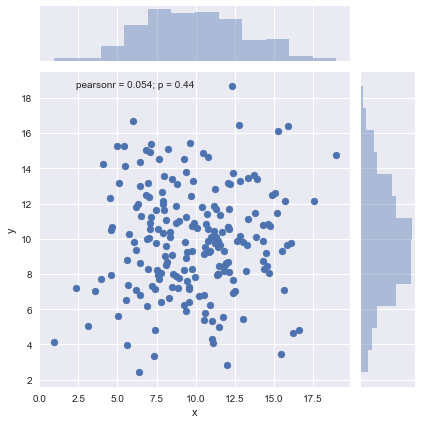

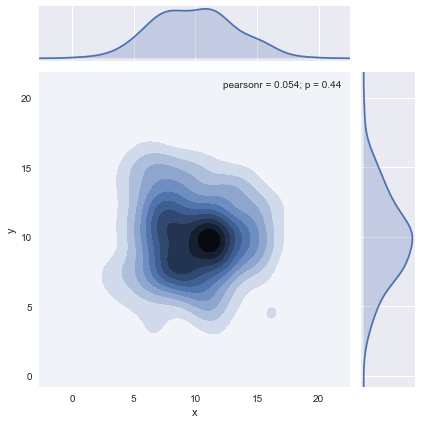

In [27]:
%matplotlib inline
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
# This is the negative gaussian function and its gradient implementation
# It returns function, grad as the values
def neg_gaussian_func(x):
    mu, cov, _, _ = getParameters()
    mu = mu.reshape((mu.shape[0],1))
    const = np.sqrt(np.linalg.det(2*np.pi*cov))
    f = -(10^4)/const *(np.exp(-1/2*np.dot(np.dot((x-mu).T, np.linalg.inv(cov)),(x-mu))))
    return f

def neg_gaussian_grad(x):
    mu, cov, _, _ = getParameters()
    mu = mu.reshape((mu.shape[0],1))
    grad = -(neg_gaussian_func(x)*np.dot(np.linalg.inv(cov),(x-mu)))
    return grad
    
def quadratic_bowl_func(x):
    _, _, A, b = getParameters()
    f = (1/2*np.dot(np.dot(x.T, A), x) - np.dot(x.T, b))
    return f

def quadratic_bowl_grad(x):
    _, _, A, b = getParameters()
    grad = np.dot(A,x) - b
    return grad
    
def batch_gradient_descent(fobj, fgrad, init, alpha=0.1, eps=10^(-8), lambd=0):
    x = init
    fgradv = []
    xv = []
    fv = []
    prev = 0.0
    curr = fobj(x)
    while (np.fabs(curr - prev) > eps) :
        grad = fgrad(x)
        
        # Parameter update
        x = x - alpha*grad
        
        # Store all the values for viz
        fgradv.append(grad)
        xv.append(x)
        fv.append(curr)
        prev = curr
        curr = fobj(x)
        print np.fabs(curr - prev)
    return xv, fgradv

if __name__ == '__main__':
    #X, y = getData()

    mean, cov, _, _ = getParameters()
    data = np.random.multivariate_normal(mean, cov, 200)
    print data.shape
    df = pd.DataFrame(data, columns=["x", "y"])
    sns.jointplot(x="x", y="y", data=df)
    sns.jointplot(x="x", y="y", data=df, kind="kde");
    init = np.zeros((2,1))
    #x, grad = batch_gradient_descent(neg_gaussian_func, neg_gaussian_grad, init)
    #x, grad = batch_gradient_descent(quadratic_ratic_bowl_func, quadratic_bowl_grad, init)

(1L, 1000L, 1000L)


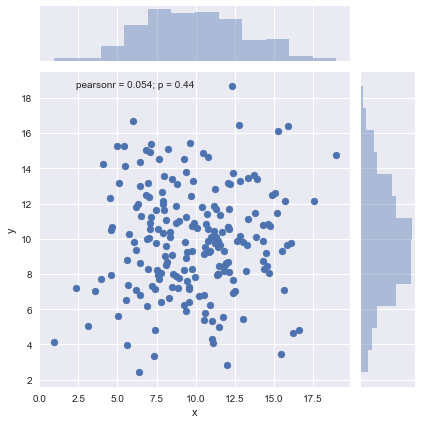

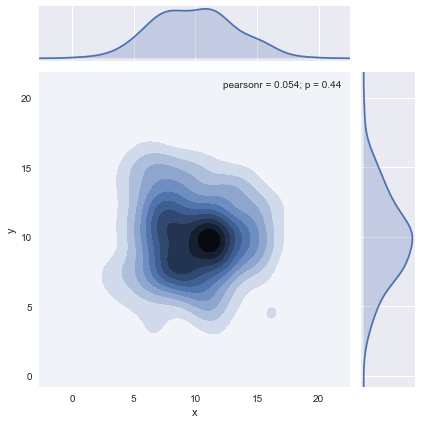

In [32]:
def neg_gaussian_func(x):
    mu, cov, _, _ = getParameters()
    const = np.sqrt(np.linalg.det(2*np.pi*cov))
    mu = mu.reshape((mu.shape[0],1))
    f = -100/const *(np.exp(-1/2*np.dot(np.dot((x-mu).T, np.linalg.inv(cov)),(x-mu))))
    return f
x = np.random.uniform(0.0, 20.0,(2,1,1000))
y = np.array([neg_gaussian_func(_x) for _x in x[:-1]])
print y.shape
y = y.reshape
df = pd.DataFrame(data, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df)
sns.jointplot(x="x", y="y", data=df, kind="kde");